**Project: Graduate Admission Prediction Using Logistic Regression**

In [5]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
graduate_adm_data = pd.read_csv("Graduate_Admission_2_1610_55.csv")

# Display the first few rows of the dataset
graduate_adm_data.head()

,Unnamed: 0,Serial.No.,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Chance.of.Admit
0,1,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
graduate_adm_data.rename(columns={'Chance.of.Admit': 'Admission Outcome'}, inplace=True)

 Check the data type of each column. Note that logistic regression models expect numeric data.


In [8]:
# Check the data type of each column and the info about the dataset
graduate_adm_data_head = graduate_adm_data.head()
graduate_adm_data_info = graduate_adm_data.info()

print(graduate_adm_data_head)
print(graduate_adm_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         400 non-null    int64  
 1   Serial.No.         400 non-null    int64  
 2   GRE.Score          400 non-null    int64  
 3   TOEFL.Score        400 non-null    int64  
 4   University.Rating  400 non-null    int64  
 5   SOP                400 non-null    float64
 6   LOR                400 non-null    float64
 7   CGPA               400 non-null    float64
 8   Research           400 non-null    int64  
 9   Admission Outcome  400 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 31.4 KB
   Unnamed: 0  Serial.No.  GRE.Score  TOEFL.Score  University.Rating  SOP  \
0           1           1        337          118                  4  4.5   
1           2           2        324          107                  4  4.0   
2           3           3        316 

In [9]:
# Drop the Unnamed: 0 and Serial Number columns as we will not be needing them in our analysis
graduate_adm_data.drop(['Unnamed: 0', 'Serial.No.'], axis=1, inplace=True)

In [10]:
#Checking for missing values
graduate_adm_data.isnull().sum()

GRE.Score            0
TOEFL.Score          0
University.Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Outcome    0
dtype: int64

In [11]:
#Create the training and testing data
X = graduate_adm_data.drop(["Admission Outcome"], axis=1)
y = graduate_adm_data["Admission Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

If a candidate's Chance of Admit is greater than 80%, the candidate will receive the 1 label.

If a candidate's Chance of Admit is less than or equal to 80%, the candidate will receive the 0 label.


In [12]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [13]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

**Model Building**

 Build a logistic regression model and fit the model to the training data.


In [14]:
Logr = LogisticRegression()
Logr.fit(X_train, y_train_01)

LogisticRegression()

**Obtain parameter estimates**

In [15]:
Logr.coef_

array([[1.96285994, 2.3747374 , 2.21347894, 1.30523568, 1.21744402,
        2.75786994, 1.19356912]])

In [16]:
Logr.intercept_

array([-9.33174759])

**Predict the outcome for the test datase**

In [17]:
#make prediction
y_pred = Logr.predict(X_test)

#Print out y_pred
print(y_pred)

[0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 0]


**Using the predict_proba function on X_test will produce the probability that each observation is a 0 or 1**

In [18]:
#Use the predict_proba and predict functions on X_test
Logr.predict_proba(X_test)

array([[0.93620853, 0.06379147],
       [0.84254893, 0.15745107],
       [0.09354941, 0.90645059],
       [0.42414572, 0.57585428],
       [0.9891527 , 0.0108473 ],
       [0.07319583, 0.92680417],
       [0.99858498, 0.00141502],
       [0.99623392, 0.00376608],
       [0.98975658, 0.01024342],
       [0.53487808, 0.46512192],
       [0.92803935, 0.07196065],
       [0.19053441, 0.80946559],
       [0.99254073, 0.00745927],
       [0.14569114, 0.85430886],
       [0.8944882 , 0.1055118 ],
       [0.95743406, 0.04256594],
       [0.98567682, 0.01432318],
       [0.99890251, 0.00109749],
       [0.88903095, 0.11096905],
       [0.04092092, 0.95907908],
       [0.99609156, 0.00390844],
       [0.97293474, 0.02706526],
       [0.96669358, 0.03330642],
       [0.99874746, 0.00125254],
       [0.09123191, 0.90876809],
       [0.71704515, 0.28295485],
       [0.90216349, 0.09783651],
       [0.99731104, 0.00268896],
       [0.9594477 , 0.0405523 ],
       [0.62447729, 0.37552271],
       [0.

 **Analyze the results**

In [19]:
#Print out the model’s accuracy, precision, recall, and F1 score.
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test_01, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test_01, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test_01, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test_01, y_pred))

Accuracy: 0.912500
Precision: 0.958333
Recall: 0.793103
F1 Score: 0.867925


In [20]:
graduate_adm_data.head()

,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Admission Outcome
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Produce a Cofusion Matrix**

In a great model we should observe a high proportion of true positives and true negatives and a low proportion of false positives
and false negatives

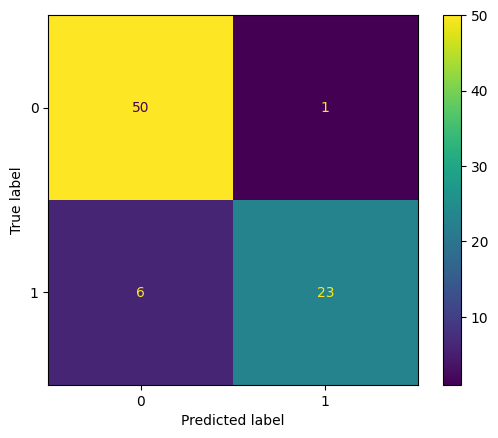

In [21]:
#Produce a confusion matrix
cm = metrics.confusion_matrix(y_test_01, y_pred, labels = Logr.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = Logr.classes_)
disp.plot()


**Make prediction on the full dataset**

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Scale the full feature dataset
X_scaled = scalerX.transform(X)

# Make predictions on the full scaled dataset
full_predictions = Logr.predict(X_scaled)

# Get probability predictions
full_prob_predictions = Logr.predict_proba(X_scaled)

# Add predictions to the original dataframe
graduate_adm_data['Predicted_Admission'] = full_predictions
graduate_adm_data['Admission_Probability'] = full_prob_predictions[:, 1]  # Probability of class 1

# Display the first few rows with predictions
print("\nFirst few rows with predictions:")
print(graduate_adm_data[['Admission Outcome', 'Predicted_Admission', 'Admission_Probability']].head())

# Get overall statistics
print("\nTotal number of predictions:", len(full_predictions))
print("Number of predicted admissions (1):", sum(full_predictions == 1))
print("Number of predicted rejections (0):", sum(full_predictions == 0))


First few rows with predictions:
   Admission Outcome  Predicted_Admission  Admission_Probability
0               0.92                    1               0.908768
1               0.76                    1               0.500697
2               0.72                    0               0.074553
3               0.80                    0               0.210266
4               0.65                    0               0.008820

Total number of predictions: 400
Number of predicted admissions (1): 101
Number of predicted rejections (0): 299


**Create a Dash Interface**

In [23]:
import joblib
joblib.dump(Logr, 'logistic_model.pkl')
joblib.dump(scalerX, 'scaler.pkl')

['scaler.pkl']

In [29]:
import dash
from dash import html, dcc, Input, Output, State
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the Dash app
app = dash.Dash(__name__)

# Load the model and scaler (assuming they're saved)
# model = joblib.load('logistic_model.pkl')
# scalerX = joblib.load('scaler.pkl')

# Define the layout of the app
app.layout = html.Div([
    html.Div([
        html.H1("Graduate Admission Prediction", style={'text-align': 'center'}),
        
        html.Div([
            dcc.Input(id='gre_score', type='number', placeholder='GRE Score (260-340)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='toefl_score', type='number', placeholder='TOEFL Score (0-120)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='university_rating', type='number', placeholder='University Rating (1-5)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='sop', type='number', placeholder='SOP Rating (1-5)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='lor', type='number', placeholder='LOR Rating (1-5)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.Input(id='cgpa', type='number', placeholder='CGPA (1-10)',
                     style={'margin': '10px', 'padding': '10px'}),
            dcc.RadioItems(
                id='research',
                options=[
                    {'label': 'Has Research Experience', 'value': 1},
                    {'label': 'No Research Experience', 'value': 0}
                ],
                value=1,
                style={'margin': '10px', 'padding': '10px'}
            ),
            html.Button('Predict Admission', id='predict_button', n_clicks=0,
                       style={'margin': '10px', 'padding': '10px', 'background-color': '#007BFF', 'color': 'white'}),
        ], style={'text-align': 'center'}),
        
        html.Div(id='prediction_output', style={'text-align': 'center', 'font-size': '20px', 'margin-top': '20px'}),
        html.Div(id='probability_output', style={'text-align': 'center', 'font-size': '16px', 'margin-top': '10px'})
    ], style={'width': '70%', 'margin': '0 auto', 'border': '2px solid #007BFF', 'padding': '20px', 'border-radius': '10px'})
])
@app.callback(
    [Output('prediction_output', 'children'),
     Output('probability_output', 'children')],
    [Input('predict_button', 'n_clicks')],
    [State('gre_score', 'value'),
     State('toefl_score', 'value'),
     State('university_rating', 'value'),
     State('sop', 'value'),
     State('lor', 'value'),
     State('cgpa', 'value'),
     State('research', 'value')]
)
def update_output(n_clicks, gre_score, toefl_score, university_rating, sop, lor, cgpa, research):
    if n_clicks > 0 and all(v is not None for v in [gre_score, toefl_score, university_rating, sop, lor, cgpa, research]):
        try:
            # Create input data as DataFrame with explicit feature names
            input_data = pd.DataFrame({
                'GRE.Score': [gre_score],
                'TOEFL.Score': [toefl_score],
                'University.Rating': [university_rating],
                'SOP': [sop],
                'LOR': [lor],
                'CGPA': [cgpa],
                'Research': [research]
            })

            # Ensure column order matches training data
            input_data = input_data.reindex(columns=X.columns)
            
            # Scale the features
            scaled_features = scalerX.transform(input_data)
            
            # Make prediction
            prediction = Logr.predict(scaled_features)[0]
            probability = Logr.predict_proba(scaled_features)[0][1]
            
            result = 'Likely to be Admitted' if prediction == 1 else 'Unlikely to be Admitted'
            return (f'Prediction: {result}', 
                    f'Admission Probability: {probability:.2%}')
            
        except Exception as e:
            return f'Error in prediction: {str(e)}', ''
    
    elif n_clicks > 0:
        return 'Please enter all values to get a prediction', ''
    return '', ''    
# Run the app
if __name__ == '__main__':
    app.run(debug=True)